In [3]:
# import whatever libraries I want
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import msm_scripts as ms
import test_system_generator as tsg

In [20]:
# check that I can get accurate estimates of free energy profiles

# generate a dataset from the above defined simulation object
simulation_data= [ ]
bias_pos=np.ceil(np.linspace(0,99,20))
bias_pos = [int(x) for x in bias_pos]
print(bias_pos)
for i in range(20):

    # define a simulation object in a given potential with a particular biasing force
    sim=tsg.simulation(potential='double_well',sim_length=2000,biasing_protocol=[4,bias_pos[i]],num_of_states=100,T=300)
    simulation_data.append(sim.generate_data())

[0, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 99]


In [21]:
M=ms.discrete_markov_model(simulation_data,sim,lag_time=1)

(Created a Markov model object at lag time 1 consisting of 20 trajctories)


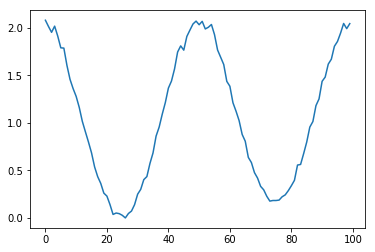

In [22]:
G, peq = ms.free_energy_profile(M.MSM, M.temp)
plt.plot(G)